## Pytorch pipeline

Pytroch pipeline to train and validate on the CIFAR10 dataset

The produced pipeline is composed of the following steps:

**1. data-processing**: Download and preprocess CIFAR10 dataset  
**2. visualization**: Visualize and show statistics about the dataset  
**3. train**: Train the deep learning model  
**4. test-on-test**: Test the model on the test set  
**5. test-on-whole**: Test the model performance on the whole dataset  

The pipeline is sequential, so every step in dependent on the previous one.

In [1]:
import subprocess
import sys

reqs = subprocess.check_output([sys.executable, '-m', 'pip', 'freeze'])
installed_packages = [r.decode().split('==')[0] for r in reqs.split()]

if 'torch' in installed_packages:
    import torch.nn as nn
    import torch
else:
    subprocess.run([sys.executable, '-m', 'pip', 'install', 'torch==1.5.0',
                    '-f', 'https://download.pytorch.org/whl/torch_stable.html', '--user'])
    import torch.nn as nn
    import torch

if 'torchvision' in installed_packages:
    import torchvision
    import torchvision.transforms as transforms
else:
    subprocess.run([sys.executable, '-m', 'pip', 'install', 'torchvision==0.6.0',
                    '-f', 'https://download.pytorch.org/whl/torch_stable.html', '--user'])
    import torchvision
    import torchvision.transforms as transform
    
import matplotlib.pyplot as plt
import numpy as np
import os

# functions to show an image
if 'function_library' in installed_packages:
    from function_library.function_library import Net, imshow
else:
    os.chdir(
        '/home/jovyan/KubeflowNotebookPipelineDeployment/kale/examples/pytorch-classification/')
    subprocess.run([sys.executable, '-m', 'pip', 'install', 'function_library', '--user'])
    from function_library.function_library import Net, imshow

In [2]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [3]:
TRAIN_STEPS = 2

#### Load and transform dataset

In [7]:
input_data_folder = "./data"

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root=input_data_folder, train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root=input_data_folder, train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


#### Visualize dataset

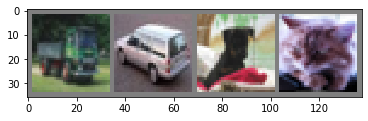

truck   car   dog   cat


In [9]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#### Define model

#### Define loss func and optimizer

In [11]:
import torch.optim as optim

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#### Train

In [12]:
for epoch in range(TRAIN_STEPS):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.238
[1,  4000] loss: 1.890
[1,  6000] loss: 1.714
[1,  8000] loss: 1.599
[1, 10000] loss: 1.554
[1, 12000] loss: 1.513
[2,  2000] loss: 1.420
[2,  4000] loss: 1.397
[2,  6000] loss: 1.389
[2,  8000] loss: 1.339
[2, 10000] loss: 1.354
[2, 12000] loss: 1.300
Finished Training


#### Test on test data

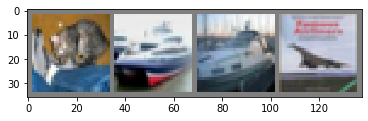

GroundTruth:    cat  ship  ship plane


In [13]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [14]:
outputs = net(images)

In [15]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


#### Performance on whole dataset

In [16]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


In [17]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 52 %
Accuracy of   car : 58 %
Accuracy of  bird : 40 %
Accuracy of   cat : 17 %
Accuracy of  deer : 49 %
Accuracy of   dog : 50 %
Accuracy of  frog : 63 %
Accuracy of horse : 68 %
Accuracy of  ship : 71 %
Accuracy of truck : 69 %
